<div style="text-align: right;"><h4>ФБ-21 Редько-Шпак Родислав</h4></div>
<h1><center>Лабораторна робота №4</center></h1>
<h3><center>З предмета "Засоби підготовки та аналізу даних"</center></h3>
<h5><b><center>Хід роботи:</center></b></h5>


====================================================================================

<h1><b>ПЕРШИЙ РІВЕНЬ</b></h1>

====================================================================================

<h4>Завантаження датасету:</h4>

In [1]:
def download_first_part():
    import urllib.request
    import zipfile
    import os

    url_download = 'https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip'
    file_name = 'individual+household+electric+power+consumption.zip'
    download_dir = 'first_part_files'
    os.makedirs(download_dir, exist_ok=True)

    file_path = os.path.join(download_dir, file_name)

    # перевірка
    if not os.path.exists(file_path):
        try:
            with urllib.request.urlopen(url_download) as url:
                with open(file_path, 'wb') as f:
                    f.write(url.read())
            print(f"=] {file_name} завантажений успішно!")
        except Exception as e:
            print(f"=] Помилка при завантаженні: {e}")
    else:
        print(f"=] {file_name} вже завантажений.")

    # розархівування
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(download_dir)
        extracted_files = zip_ref.namelist()

    print(f"=] Тека зберігання архіву: {os.path.abspath(download_dir)}")
    print(f"=] Файли, отримані з архіву:")
    for file in extracted_files:
        print(f"    - {file}")

download_first_part()

=] individual+household+electric+power+consumption.zip вже завантажений.
=] Тека зберігання архіву: c:\Users\rdk\Documents\ad_lab_4\first_part_files
=] Файли, отримані з архіву:
    - household_power_consumption.txt


<h4>Створення функцій для data cleaning (звичайне відкидання даних або заміна поточного Nan значення на попереднє)</h4>

In [2]:
import pandas as pd

def first_pd_df_creator():
    url = "first_part_files/household_power_consumption.txt"
    df = pd.read_csv(url, sep=";", low_memory=False, na_values=['?'])
    df.dropna(inplace=True)

    return df

def first_pd_df(df):
    df['datetime'] = pd.to_datetime(df['Date'].str.cat(df['Time'], sep=' '), format='%d/%m/%Y %H:%M:%S')
    df.drop(['Date', 'Time'], axis=1, inplace=True)
    print("Pandas dataframe створений успішно!")
    return df

def first_np_ar(df):
    numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    df[numeric_columns] = df[numeric_columns].astype(float)
    df = df.to_numpy()
    print("Numpy array створений успішно!")
    return df

<h2><b>ЧАСТИНА 1</b> | PANDAS DATAFRAME</h2>

In [3]:
temp_df = first_pd_df_creator()
household_power = first_pd_df(temp_df)
household_power.head()

Pandas dataframe створений успішно!


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


<h4>1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.</h4>

In [4]:
from timeit import timeit
def fp_first_task_df(arr):
    households_over_5kw = arr[arr['Global_active_power'] > 5]
    return households_over_5kw

first_task_df = fp_first_task_df(household_power)
time_first_task_df = timeit(lambda: fp_first_task_df(household_power), number=1)

print(f"Кількість домогосподарств з потужністю > 5 кВт: {len(first_task_df)}")
print(f"Час виконання: {time_first_task_df} секунд")
first_task_df.head()


Кількість домогосподарств з потужністю > 5 кВт: 17547
Час виконання: 0.0037751999998363317 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
11,5.412,0.470,232.78,23.2,0.0,1.0,17.0,2006-12-16 17:35:00
12,5.224,0.478,232.99,22.4,0.0,1.0,16.0,2006-12-16 17:36:00


<h4>2. Обрати всі домогосподарства, у яких вольтаж перевищує 235 В.</h4>

In [5]:
def fp_second_task_df(arr):
    households_over_235v = arr[arr['Voltage'] > 235]
    return households_over_235v

second_task_df = fp_second_task_df(household_power)
time_second_task_df = timeit(lambda: fp_second_task_df(household_power), number=1)

print(f"Кількість домогосподарств з вольтажем > 235 В: {len(second_task_df)}")
print(f"Час виконання: {time_second_task_df} секунд")
second_task_df.head()

Кількість домогосподарств з вольтажем > 235 В: 1952491
Час виконання: 0.0634965999997803 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
5,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
6,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00
7,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00
14,4.054,0.422,235.24,17.6,0.0,1.0,17.0,2006-12-16 17:38:00


<h4>3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.</h4>

In [6]:
def fp_third_task_df(df):
    households_19_20A = df.loc[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)]
    households_washer_fridge_gt_boiler_ac = households_19_20A.loc[households_19_20A['Sub_metering_2'] > households_19_20A['Sub_metering_3']]
    return households_washer_fridge_gt_boiler_ac

third_task_df = fp_third_task_df(household_power)
time_third_task_df = timeit(lambda: fp_third_task_df(household_power), number=1)

print(f"Кількість домогосподарств зі струмом 19-20А, де пральна машина та холодильник > бойлер і кондиціонер: {len(third_task_df)}")
print(f"Час виконання: {time_third_task_df} секунд")
third_task_df.head()

Кількість домогосподарств зі струмом 19-20А, де пральна машина та холодильник > бойлер і кондиціонер: 2509
Час виконання: 0.006981699999869306 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
45,4.464,0.136,234.66,19.0,0.0,37.0,16.0,2006-12-16 18:09:00
460,4.582,0.258,238.08,19.6,0.0,13.0,0.0,2006-12-17 01:04:00
464,4.618,0.104,239.61,19.6,0.0,27.0,0.0,2006-12-17 01:08:00
475,4.636,0.140,237.37,19.4,0.0,36.0,0.0,2006-12-17 01:19:00
476,4.634,0.152,237.17,19.4,0.0,35.0,0.0,2006-12-17 01:20:00


<h4>4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії</h4>

In [7]:
def fp_fourth_task_df(df):
    random_households = df.sample(n=500000, replace=False)
    
    mean_sub_metering_1_df = random_households['Sub_metering_1'].mean()
    time_mean_sub_metering_1_df = timeit(lambda: random_households['Sub_metering_1'].mean(), number=1)
    print(f"Середнє споживання для групи 1: {mean_sub_metering_1_df:.3f} Вт-годин")
    print(f"Час виконання для групи 1: {time_mean_sub_metering_1_df} секунд\n")

    mean_sub_metering_2_df = random_households['Sub_metering_2'].mean()
    time_mean_sub_metering_2_df = timeit(lambda: random_households['Sub_metering_2'].mean(), number=1)
    print(f"Середнє споживання для групи 2: {mean_sub_metering_2_df:.3f} Вт-годин")
    print(f"Час виконання для групи 2: {time_mean_sub_metering_2_df} секунд\n")

    mean_sub_metering_3_df = random_households['Sub_metering_3'].mean()
    time_mean_sub_metering_3_df = timeit(lambda: random_households['Sub_metering_3'].mean(), number=1)
    print(f"Середнє споживання для групи 3: {mean_sub_metering_3_df:.3f} Вт-годин")
    print(f"Час виконання для групи 3: {time_mean_sub_metering_3_df} секунд")
    return time_mean_sub_metering_1_df, time_mean_sub_metering_2_df, time_mean_sub_metering_3_df

time_mean_sub_metering_1_df, time_mean_sub_metering_2_df, time_mean_sub_metering_3_df = fp_fourth_task_df(household_power)

Середнє споживання для групи 1: 1.120 Вт-годин
Час виконання для групи 1: 0.0005961000001661887 секунд

Середнє споживання для групи 2: 1.295 Вт-годин
Час виконання для групи 2: 0.0007547999998678279 секунд

Середнє споживання для групи 3: 6.458 Вт-годин
Час виконання для групи 3: 0.000620599999820115 секунд


<h4>5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких:</h4>
<h5>a) основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), </h5>
<h5>b) а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини</h5>

In [8]:
def fp_fifth_task_df(df):
    df = df[df['datetime'].dt.hour >= 18]
    df = df[df['Global_active_power'] > 6]

    df = df[df['Sub_metering_2'] > df['Sub_metering_1']]
    df = df[df['Sub_metering_2'] > df['Sub_metering_3']]

    n = len(df)

    first_half = df.iloc[:n//2]
    second_half = df.iloc[n//2:]
    selected_first_half = first_half.iloc[::3]
    selected_second_half = second_half.iloc[::4]
    selected_households = pd.concat([selected_first_half, selected_second_half])

    return selected_households


time_fifth_task_df = timeit(lambda: fp_fifth_task_df(household_power), number=1)
result_task5np = fp_fifth_task_df(household_power)
print(f"Кількість відібраних домогосподарств: {len(result_task5np)}")
print(f"Час виконання: {time_fifth_task_df} секунд")
result_task5np

Кількість відібраних домогосподарств: 310
Час виконання: 0.05999610000026223 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
41,6.052,0.192,232.93,26.2,0.0,37.0,17.0,2006-12-16 18:05:00
44,6.308,0.116,232.25,27.0,0.0,36.0,17.0,2006-12-16 18:08:00
17494,6.386,0.374,236.63,27.0,1.0,36.0,17.0,2006-12-28 20:58:00
17498,8.088,0.262,235.50,34.4,1.0,72.0,17.0,2006-12-28 21:02:00
17501,7.230,0.152,235.22,30.6,1.0,73.0,17.0,2006-12-28 21:05:00
...,...,...,...,...,...,...,...,...
2066466,6.620,0.314,229.00,29.2,18.0,34.0,16.0,2010-11-20 18:30:00
2066470,6.266,0.360,229.82,27.6,14.0,35.0,16.0,2010-11-20 18:34:00
2066474,6.302,0.376,229.65,27.8,15.0,34.0,17.0,2010-11-20 18:38:00
2066478,6.238,0.344,229.37,27.6,14.0,35.0,16.0,2010-11-20 18:42:00


<h2><b>ЧАСТИНА 2</b> | NUMPY ARRAY</h2>

In [9]:
import numpy as np
from timeit import timeit

def print_array_info(array, columns=None, num_rows=5):
    all_column_names = ['Date', 'Time', 'Global_active_power', 
                        'Global_reactive_power', 'Voltage', 'Global_intensity', 
                        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
    
    if columns is None:
        column_names = all_column_names
    else:
        column_names = columns
        column_indices = [all_column_names.index(col) for col in column_names]

    format_string = "{:<10} {:<25}" + " {:<25}" * (len(column_names) - 1)
    header = [''] + column_names
    print(format_string.format(*header))

    for idx, row in enumerate(array[:num_rows]):
        if columns is None:
            row_values = row
        else:
            row_values = [row[i] for i in column_indices]
        print(format_string.format(idx, *row_values))

    if len(array) > 2 * num_rows:
        print("...")

    for idx, row in enumerate(array[-num_rows:], start=len(array)-num_rows):
        if columns is None:
            row_values = row
        else:
            row_values = [row[i] for i in column_indices]
        print(format_string.format(idx, *row_values))

temp_df = first_pd_df_creator()
household_power_array = first_np_ar(temp_df)
print_array_info(household_power_array)

print(f"Кількість записів: {household_power_array.shape[0]}")

Numpy array створений успішно!
           Date                      Time                      Global_active_power       Global_reactive_power     Voltage                   Global_intensity          Sub_metering_1            Sub_metering_2            Sub_metering_3           
0          16/12/2006                17:24:00                  4.216                     0.418                     234.84                    18.4                      0.0                       1.0                       17.0                     
1          16/12/2006                17:25:00                  5.36                      0.436                     233.63                    23.0                      0.0                       1.0                       16.0                     
2          16/12/2006                17:26:00                  5.374                     0.498                     233.29                    23.0                      0.0                       2.0                       17.0           

<h4>1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.</h4>

In [10]:
def fp_first_task_np(arr):
    return arr[arr[:, 2] > 5]

first_task_np = fp_first_task_np(household_power_array)
time_first_task_np = timeit(lambda: fp_first_task_np(household_power_array), number=1)

print(f"Кількість домогосподарств з потужністю > 5 кВт: {len(first_task_np)}")
print(f"Час виконання: {time_first_task_np} секунд")
print_array_info(first_task_np, columns=['Date', 'Time', 'Global_active_power'])

Кількість домогосподарств з потужністю > 5 кВт: 17547
Час виконання: 0.039403999999649386 секунд
           Date                      Time                      Global_active_power      
0          16/12/2006                17:25:00                  5.36                     
1          16/12/2006                17:26:00                  5.374                    
2          16/12/2006                17:27:00                  5.388                    
3          16/12/2006                17:35:00                  5.412                    
4          16/12/2006                17:36:00                  5.224                    
...
17542      22/11/2010                18:40:00                  5.408                    
17543      22/11/2010                18:41:00                  5.528                    
17544      24/11/2010                07:50:00                  5.172                    
17545      24/11/2010                07:51:00                  5.75                     
17546    

<h4>2. Обрати всі домогосподарства, у яких вольтаж перевищує 235 В.</h4>

In [11]:
def fp_second_task_np(arr):
    return arr[arr[:, 4] > 235]

second_task_np = fp_second_task_np(household_power_array)
time_second_task_np = timeit(lambda: fp_second_task_np(household_power_array), number=1)

print(f"Кількість домогосподарств з вольтажем > 235 В: {len(second_task_np)}")
print(f"Час виконання: {time_second_task_np} секунд")
print_array_info(second_task_np, columns=['Date', 'Time','Voltage'])

Кількість домогосподарств з вольтажем > 235 В: 1952491
Час виконання: 0.1667051999997966 секунд
           Date                      Time                      Voltage                  
0          16/12/2006                17:28:00                  235.68                   
1          16/12/2006                17:29:00                  235.02                   
2          16/12/2006                17:30:00                  235.09                   
3          16/12/2006                17:31:00                  235.22                   
4          16/12/2006                17:38:00                  235.24                   
...
1952486    26/11/2010                20:58:00                  240.43                   
1952487    26/11/2010                20:59:00                  240.0                    
1952488    26/11/2010                21:00:00                  239.82                   
1952489    26/11/2010                21:01:00                  239.7                    
1952490   

<h4>3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.</h4>

In [12]:
def fp_third_task_np(arr):
    ampers_filtred = arr[(arr[:, 5] >= 19) & (arr[:, 5] <= 20)]
    high_sub2_sub3_households = ampers_filtred[ampers_filtred[:, 7] > ampers_filtred[:, 8]]
    return high_sub2_sub3_households

third_task_np = fp_third_task_np(household_power_array)
time_third_task_np = timeit(lambda: fp_third_task_np(household_power_array), number=1)

print(f"Кількість домогосподарств з силою струму 19-20 А, де sub_metering_2 > sub_metering_3: {third_task_np.shape[0]}")
print(f"Час виконання: {time_third_task_np} секунд")
print_array_info(third_task_np)

Кількість домогосподарств з силою струму 19-20 А, де sub_metering_2 > sub_metering_3: 2509
Час виконання: 0.06971220000014 секунд
           Date                      Time                      Global_active_power       Global_reactive_power     Voltage                   Global_intensity          Sub_metering_1            Sub_metering_2            Sub_metering_3           
0          16/12/2006                18:09:00                  4.464                     0.136                     234.66                    19.0                      0.0                       37.0                      16.0                     
1          17/12/2006                01:04:00                  4.582                     0.258                     238.08                    19.6                      0.0                       13.0                      0.0                      
2          17/12/2006                01:08:00                  4.618                     0.104                     239.61              

<h4>4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії</h4>

In [13]:
def fp_fourth_task_np(arr):
    random_indices = np.random.choice(arr.shape[0], size=500000, replace=False)
    random_households = arr[random_indices]

    mean_sub_metering_1_np = np.mean(random_households[:, 6])
    time1 = timeit(lambda: np.mean(random_households[:, 6]), number=1)
    print(f"Середнє споживання для групи 1: {mean_sub_metering_1_np:.3f} Вт-годин")
    print(f"Час виконання для групи 1: {time1} секунд\n")

    mean_sub_metering_2_np = np.mean(random_households[:, 7]) 
    time2 = timeit(lambda: np.mean(random_households[:, 7]), number=1)
    print(f"Середнє споживання для групи 2: {mean_sub_metering_2_np:.3f} Вт-годин")
    print(f"Час виконання для групи 1: {time2} секунд\n")

    mean_sub_metering_3_np = np.mean(random_households[:, 8])
    time3 = timeit(lambda: np.mean(random_households[:, 8]), number=1)
    print(f"Середнє споживання для групи 3: {mean_sub_metering_3_np:.3f} Вт-годин")
    print(f"Час виконання для групи 1: {time3} секунд\n")

    return time1, time2, time3
time_mean_sub_metering_1_np, time_mean_sub_metering_2_np, time_mean_sub_metering_3_np = fp_fourth_task_np(household_power_array)

Середнє споживання для групи 1: 1.112 Вт-годин
Час виконання для групи 1: 0.018246000000090135 секунд

Середнє споживання для групи 2: 1.298 Вт-годин
Час виконання для групи 1: 0.01750899999979083 секунд

Середнє споживання для групи 3: 6.463 Вт-годин
Час виконання для групи 1: 0.017962400000214984 секунд



<h4>5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких:</h4>
<h5>a) основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), </h5>
<h5>b) а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини</h5>

In [14]:
def fp_fifth_task_np(df):
    df = df[(df[:, 1] >= '18:00:00') & (df[:, 2] > 6)]
    df = df[df[:, 7] > df[:, 6]]
    df = df[df[:, 7] > df[:, 8]]

    if df.shape[0] > 0:
        first_half = df[:len(df)//2]
        second_half = df[len(df)//2:]

        selected_first_half = first_half[::3]
        selected_second_half = second_half[::4]

        selected_households = np.concatenate((selected_first_half, selected_second_half))
        return selected_households
    else:
        print("Не знайдено домогосподарств, що задовольняють умови.")
        return None
    
time_fifth_task_np = timeit(lambda: fp_fifth_task_np(household_power_array), number=1)    
print(f"Кількість відібраних домогосподарств: {fp_fifth_task_np(household_power_array).shape[0]}")
print_array_info(fp_fifth_task_np(household_power_array))

Кількість відібраних домогосподарств: 310
           Date                      Time                      Global_active_power       Global_reactive_power     Voltage                   Global_intensity          Sub_metering_1            Sub_metering_2            Sub_metering_3           
0          16/12/2006                18:05:00                  6.052                     0.192                     232.93                    26.2                      0.0                       37.0                      17.0                     
1          16/12/2006                18:08:00                  6.308                     0.116                     232.25                    27.0                      0.0                       36.0                      17.0                     
2          28/12/2006                20:58:00                  6.386                     0.374                     236.63                    27.0                      1.0                       36.0                      17.0

<h4>Таблиця з часом виконання: </h4>

In [15]:
time_data = {
    'Task№1': [time_first_task_df, time_first_task_np],
    'Task№2': [time_second_task_df, time_second_task_np],
    'Task№3': [time_third_task_df, time_third_task_np],
    'Task№4.1': [time_mean_sub_metering_1_df, time_mean_sub_metering_1_np],
    'Task№4.2': [time_mean_sub_metering_2_df, time_mean_sub_metering_2_np],
    'Task№4.3': [time_mean_sub_metering_3_df, time_mean_sub_metering_3_np],
    'Task№5': [time_fifth_task_df, time_fifth_task_np]
}
df = pd.DataFrame(time_data, index=['PD', 'NP'])
print(df)
print("\nСтавлю Pandas 5, а Numpy 3. \nОсобисто мені пандас набагато зручніший, ніж нампай.")

      Task№1    Task№2    Task№3  Task№4.1  Task№4.2  Task№4.3    Task№5
PD  0.003775  0.063497  0.006982  0.000596  0.000755  0.000621  0.059996
NP  0.039404  0.166705  0.069712  0.018246  0.017509  0.017962  0.062551

Ставлю Pandas 5, а Numpy 3. 
Особисто мені пандас набагато зручніший, ніж нампай.


====================================================================================

<h1><b>ДРУГИЙ РІВЕНЬ</b></h1>

====================================================================================

<h4>Завантаження датасету:</h4>

In [16]:
import urllib.request
import zipfile
import os

url_download = 'https://archive.ics.uci.edu/static/public/32/cylinder+bands.zip'
file_name = 'cylinder+bands.zip'
download_dir = 'second_part_files'
os.makedirs(download_dir, exist_ok=True)

file_path = os.path.join(download_dir, file_name)

# перевірка чи є
if not os.path.exists(file_path):
    try:
        with urllib.request.urlopen(url_download) as url:
            with open(file_path, 'wb') as f:
                f.write(url.read())
        print(f"=] {file_name} завантажений успішно!")
    except Exception as e:
        print(f"=] Помилка при завантаженні: {e}")
else:
    print(f"=] {file_name} вже завантажений.")

# розархівування
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)
    extracted_files = zip_ref.namelist()

print(f"=] Тека зберігання архіву: {os.path.abspath(download_dir)}")
print(f"=] Файли, отримані з архіву:")
for file in extracted_files:
    print(f"    - {file}")

=] cylinder+bands.zip вже завантажений.
=] Тека зберігання архіву: c:\Users\rdk\Documents\ad_lab_4\second_part_files
=] Файли, отримані з архіву:
    - Index
    - bands.data
    - bands.names


<h4>Створення датафрейма:</h4>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def data_framer():

    df = pd.read_csv('second_part_files/bands.data', sep=',', header=None, na_values='?')
    df.columns = [
        'timestamp', 'cylinder_number', 'customer', 'job_number', 
        'grain_screened', 'ink_color', 'proof_on_ctd_ink', 'blade_mfg', 
        'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 
        'solvent_type', 'type_on_cylinder', 'press_type', 'press', 
        'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank', 
        'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humidity', 
        'roughness', 'blade_pressure', 'varnish_pct', 'press_speed', 
        'ink_pct', 'solvent_pct', 'esa_voltage', 'esa_amperage', 
        'wax', 'hardener', 'roller_durometer', 'current_density', 
        'anode_space_ratio', 'chrome_content', 'band_type']
    print(f"=] Датафрейм успішно створено.")
    print(f"=] Кількість рядків: {len(df)}")
    return df

<h4>Вивів кільість null елементів датасету (і текстово, і графічно (barplot та heatmap)):</h4>

=] Датафрейм успішно створено.
=] Кількість рядків: 541
paper_mill_location    157
blade_pressure          65
blade_mfg               60
esa_voltage             58
varnish_pct             57
ink_pct                 57
solvent_pct             57
proof_on_ctd_ink        57
solvent_type            56
esa_amperage            56
roller_durometer        56
proof_cut               55
grain_screened          49
roughness               32
caliper                 28
direct_steam            25
plating_tank            19
type_on_cylinder        19
press_speed             12
current_density          9
anode_space_ratio        9
hardener                 9
wax                      8
viscosity                6
chrome_content           5
cylinder_size            4
ink_temperature          4
humidity                 3
band_type                2
cylinder_number          1
press                    1
press_type               1
ink_type                 1
job_number               1
unit_number              0

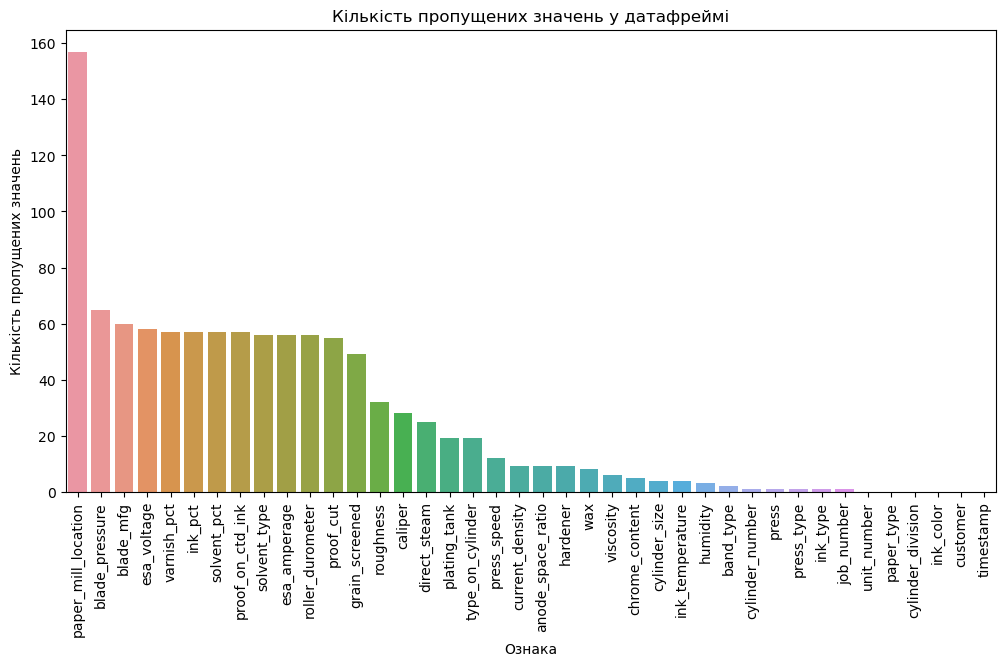

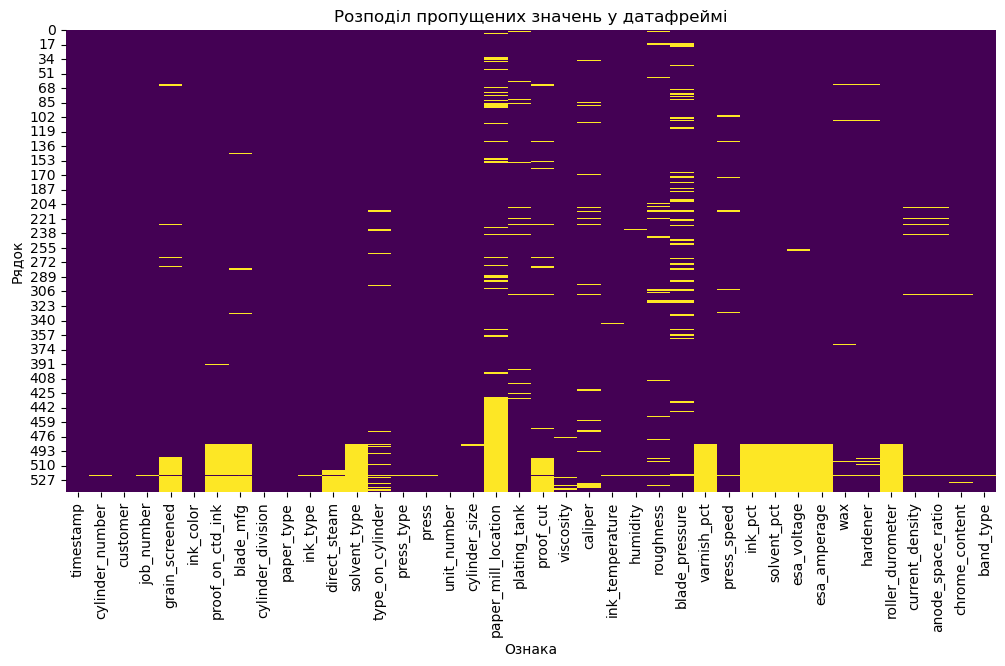

In [18]:
import pandas as pd
df = data_framer()
missing_values = df.isnull().sum()
sorted_missing = missing_values.sort_values(ascending=False)
print(sorted_missing)

# графік
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_missing.index, y=sorted_missing.values)
plt.xticks(rotation=90)
plt.title("Кількість пропущених значень у датафреймі")
plt.xlabel("Ознака")
plt.ylabel("Кількість пропущених значень")
plt.show()

# хітмапа
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Розподіл пропущених значень у датафреймі")
plt.xlabel("Ознака")
plt.ylabel("Рядок")
plt.show()


<h2>Виконання завдань:</h24>

<h4>1. Поборотися із зниклими даними. (Прибрати їх, або замінити на інше значення).</h4>

timestamp              0
cylinder_number        0
caliper                0
ink_temperature        0
humidity               0
roughness              0
blade_pressure         0
varnish_pct            0
press_speed            0
ink_pct                0
solvent_pct            0
esa_voltage            0
esa_amperage           0
wax                    0
hardener               0
roller_durometer       0
current_density        0
anode_space_ratio      0
chrome_content         0
viscosity              0
proof_cut              0
plating_tank           0
paper_type             0
customer               0
job_number             0
grain_screened         0
ink_color              0
proof_on_ctd_ink       0
blade_mfg              0
cylinder_division      0
ink_type               0
paper_mill_location    0
direct_steam           0
solvent_type           0
type_on_cylinder       0
press_type             0
press                  0
unit_number            0
cylinder_size          0
band_type              0


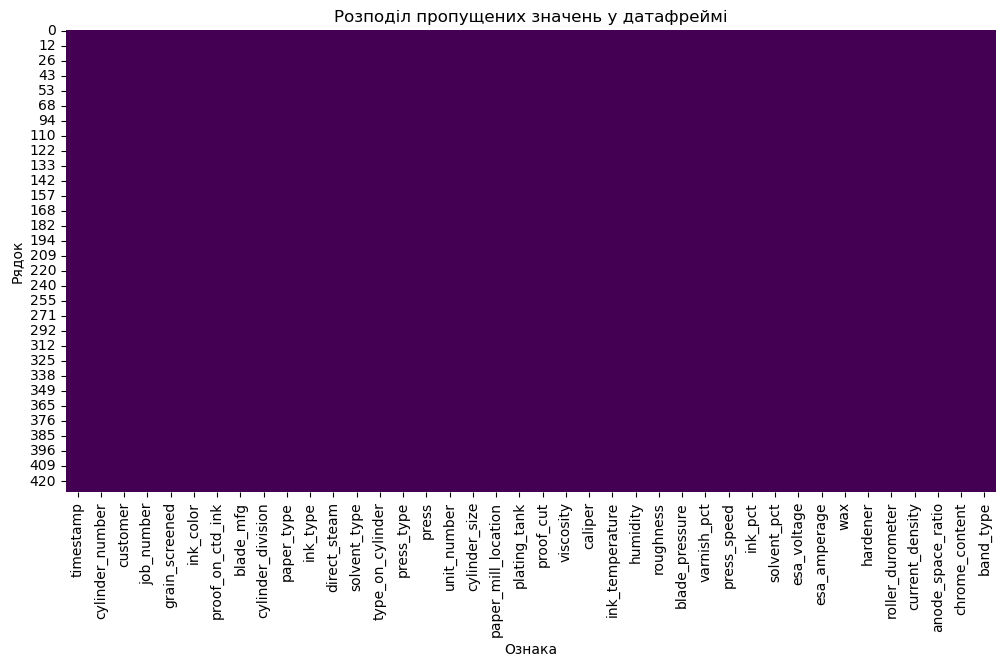

In [19]:
def dropna_clearing(df):
    df = df.dropna()
    missing_values = df.isnull().sum()
    sorted_missing = missing_values.sort_values(ascending=False)
    print(sorted_missing)

    # хітмапа
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
    plt.title("Розподіл пропущених значень у датафреймі")
    plt.xlabel("Ознака")
    plt.ylabel("Рядок")
    plt.show()

    return df

def fillna_clearing(df):
    df = df.fillna(method='ffill')

    # кількість пропущених значень
    missing_values = df.isnull().sum()
    sorted_missing = missing_values.sort_values(ascending=False)

    # графік
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_missing.index, y=sorted_missing.values)
    plt.xticks(rotation=90)
    plt.title("Кількість пропущених значень у датафреймі")
    plt.xlabel("Ознака")
    plt.ylabel("Кількість пропущених значень")
    plt.show()

    return df

# df2 = df.copy()
# df2 = fillna_clearing(df)
df = dropna_clearing(df)

<h4>Переглянув дані:</h4>

In [20]:
df

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,esa_voltage,esa_amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,X126,TVGUIDE,25503.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,band
3,19910104,T133,MASSEY,39039.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,noband
5,19910104,T218,MASSEY,38039.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5.0,0.0,2.5,0.8,40.0,40.0,103.87,100.0,noband
6,19910111,X249,ROSES,35751.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6.0,0.0,2.5,0.6,30.0,40.0,106.67,100.0,noband
7,19910111,X788,ROSES,35751.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6.0,0.0,2.5,1.1,30.0,40.0,106.67,100.0,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,19901211,X242,AMES,34590.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,41.2,8.0,0.0,3.0,1.0,33.0,40.0,106.45,100.0,noband
426,19901214,X108,ECKERDS,34693.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,1.0,0.0,2.5,1.5,30.0,40.0,106.45,100.0,noband
427,19901218,X80,ECKERDS,34694.0,NO,KEY,YES,BENTON,GALLATIN,COATED,...,39.5,4.5,0.0,1.9,1.3,30.0,40.0,114.28,100.0,noband
428,19901218,F482,DOWNS,35525.0,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.1,4.0,0.0,3.0,1.0,40.0,40.0,117.85,100.0,noband


<h4>2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).</h4>

In [21]:
def normalize_data(data):
    """
    Нормалізує дані за формулою: (x - min(x)) / (max(x) - min(x))
    """
    return (data - data.min()) / (data.max() - data.min())

def standardize_data(data):
    """
    Стандартизує дані за формулою: (x - mean(x)) / std(x)
    """
    return (data - data.mean()) / data.std()

num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns]

for col in num_cols:
    df[f'norm_{col}'] = normalize_data(df[col])

for col in num_cols:
    df[f'std_{col}'] = standardize_data(df[col])

print(f"Нормалізовані дані: Min = {df['norm_proof_cut'].min()}, Max = {df['norm_proof_cut'].max()}")
print(f"Стандартизовані дані: Mean = {df['std_proof_cut'].mean()}, Std = {df['std_proof_cut'].std()}")

Нормалізовані дані: Min = 0.0, Max = 1.0
Стандартизовані дані: Mean = -1.0260544920723469e-16, Std = 0.9999999999999982


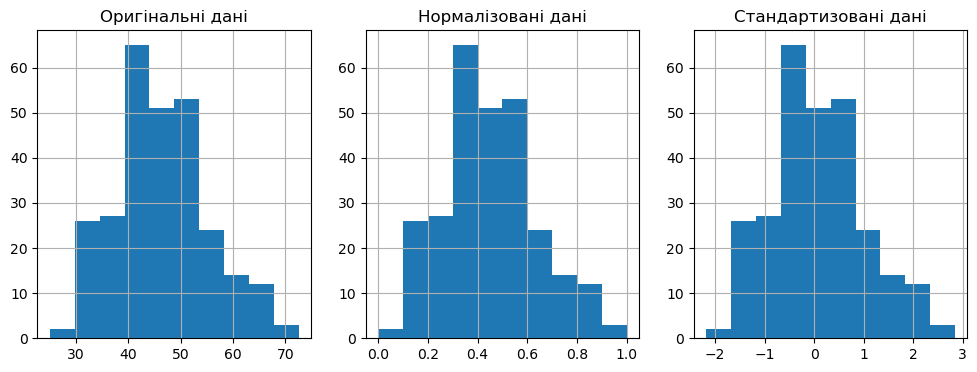

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df['proof_cut'].hist()
plt.title('Оригінальні дані')

plt.subplot(1, 3, 2)
df['norm_proof_cut'].hist()
plt.title('Нормалізовані дані')

plt.subplot(1, 3, 3)
df['std_proof_cut'].hist()
plt.title('Стандартизовані дані')

plt.show()

1. Оригінальні дані - нерівномірний розподіл,
2. Нормалізовані дані - розподіл в межах від 0 до 1,
3. Стандартизовані дані - середнє значення 0 та стандартне відхилення 1.

<h4>3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.</h4>

c:\Users\rdk\anaconda3\envs\lab2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


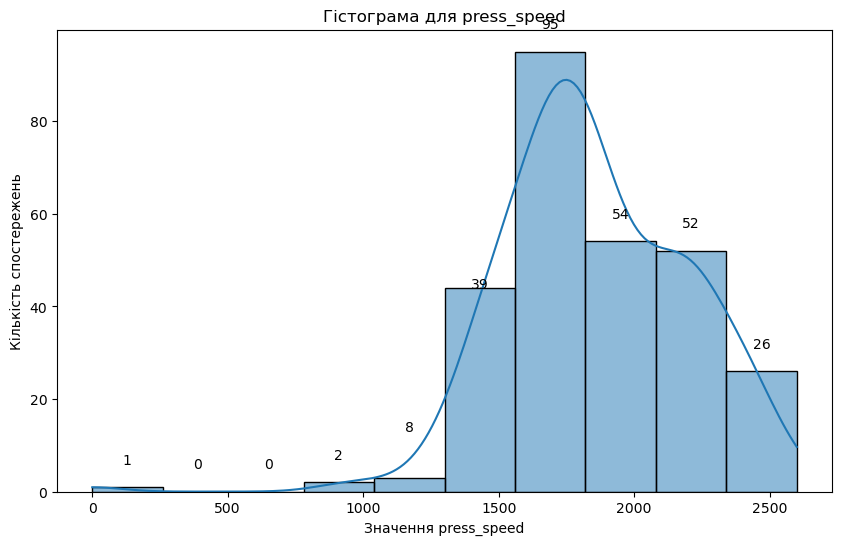

Кількість елементів в кожному діапазоні:
(-2.601, 260.0]      1
(260.0, 520.0]       0
(520.0, 780.0]       0
(780.0, 1040.0]      2
(1040.0, 1300.0]     8
(1300.0, 1560.0]    39
(1560.0, 1820.0]    95
(1820.0, 2080.0]    54
(2080.0, 2340.0]    52
(2340.0, 2600.0]    26
Name: count, dtype: int64
Максимальна кількість елементів в одному діапазоні: 95
Загальна кількість елементів: 277


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='press_speed', bins=10, kde=True)
plt.title('Гістограма для press_speed')
plt.xlabel('Значення press_speed')
plt.ylabel('Кількість спостережень')

# кількість елементів в кожному діапазоні
value_counts = df['press_speed'].value_counts(bins=10, sort=False)

# текст над кожним стовбцем
for idx, count in enumerate(value_counts):
    plt.text(value_counts.index[idx].mid, count + 5, str(count), ha='center')
plt.show()

print(f"Кількість елементів в кожному діапазоні:\n{value_counts}")
print(f"Максимальна кількість елементів в одному діапазоні: {value_counts.max()}")
total_count = df['press_speed'].count()
print(f"Загальна кількість елементів: {total_count}")

<h4>4. Збудувати графік залежності одного integer/real атрибута від іншого.</h4>

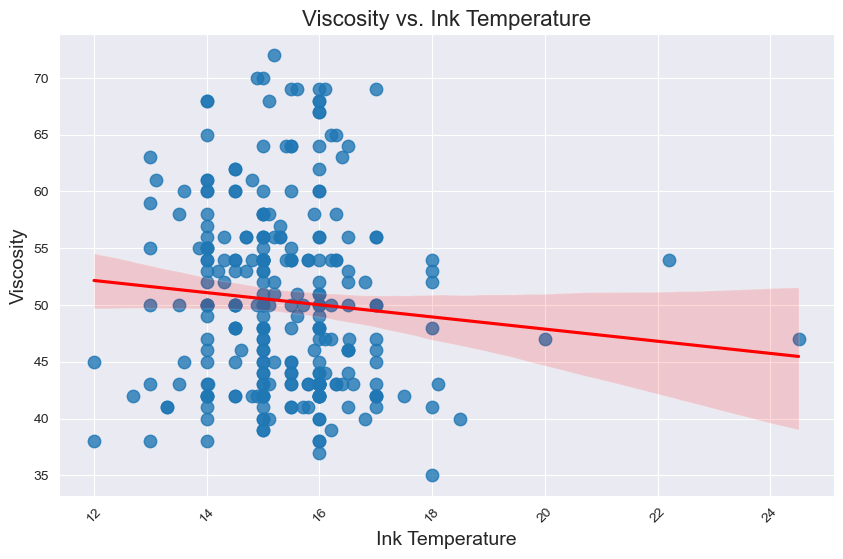

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='ink_temperature', y='viscosity', data=df, scatter_kws={'s': 80}, line_kws={'color': 'r'}, ax=ax)

ax.set_title('Viscosity vs. Ink Temperature', fontsize=16)
ax.set_xlabel('Ink Temperature', fontsize=14)
ax.set_ylabel('Viscosity', fontsize=14)

plt.xticks(rotation=45)
plt.show()

<h4>5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.</h4>

In [25]:
import scipy.stats as stats

# коефіцієнт Пірсона
pearson_coef, p_value = stats.pearsonr(df['viscosity'], df['press_speed'])
print(f"Коефіцієнт Пірсона: {pearson_coef}")

# коефіцієнт Спірмена
spearman_coef, p_value = stats.spearmanr(df['viscosity'], df['press_speed'])
print(f"Коефіцієнт Спірмена: {spearman_coef}")

Коефіцієнт Пірсона: 0.06544170919947437
Коефіцієнт Спірмена: 0.07819090697925947


<h4>6. Провести One Hot Encoding категоріального string атрибуту.</h4>

In [26]:
from sklearn.preprocessing import OneHotEncoder
df_copy = df.copy()
ohe = OneHotEncoder()

# OneHotEncoder для "paper_type"
paper_type_encoded = ohe.fit_transform(df_copy[['paper_type']]).toarray()

# нові колонки до df_copy
paper_type_columns = ohe.categories_[0]
for i, col in enumerate(paper_type_columns):
    df_copy[col] = paper_type_encoded[:, i]

print(df_copy[['paper_type'] + list(paper_type_columns)])

    paper_type  COATED  UNCOATED
0     UNCOATED     0.0       1.0
3     UNCOATED     0.0       1.0
5     UNCOATED     0.0       1.0
6       COATED     1.0       0.0
7       COATED     1.0       0.0
..         ...     ...       ...
424     COATED     1.0       0.0
426     COATED     1.0       0.0
427     COATED     1.0       0.0
428   UNCOATED     0.0       1.0
429   UNCOATED     0.0       1.0

[277 rows x 3 columns]



<h4>7. Провести візуалізацію багатовимірних даних.</h4>

Функція sns.pairplot() створю сітку діаграм розсіювання, що відображає парні зв'язки між усіма числовими ознаками в наборі даних. Це дає повне уявлення про кореляцію та розподіл різних атрибутів.

c:\Users\rdk\anaconda3\envs\lab2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rdk\anaconda3\envs\lab2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rdk\anaconda3\envs\lab2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rdk\anaconda3\envs\lab2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

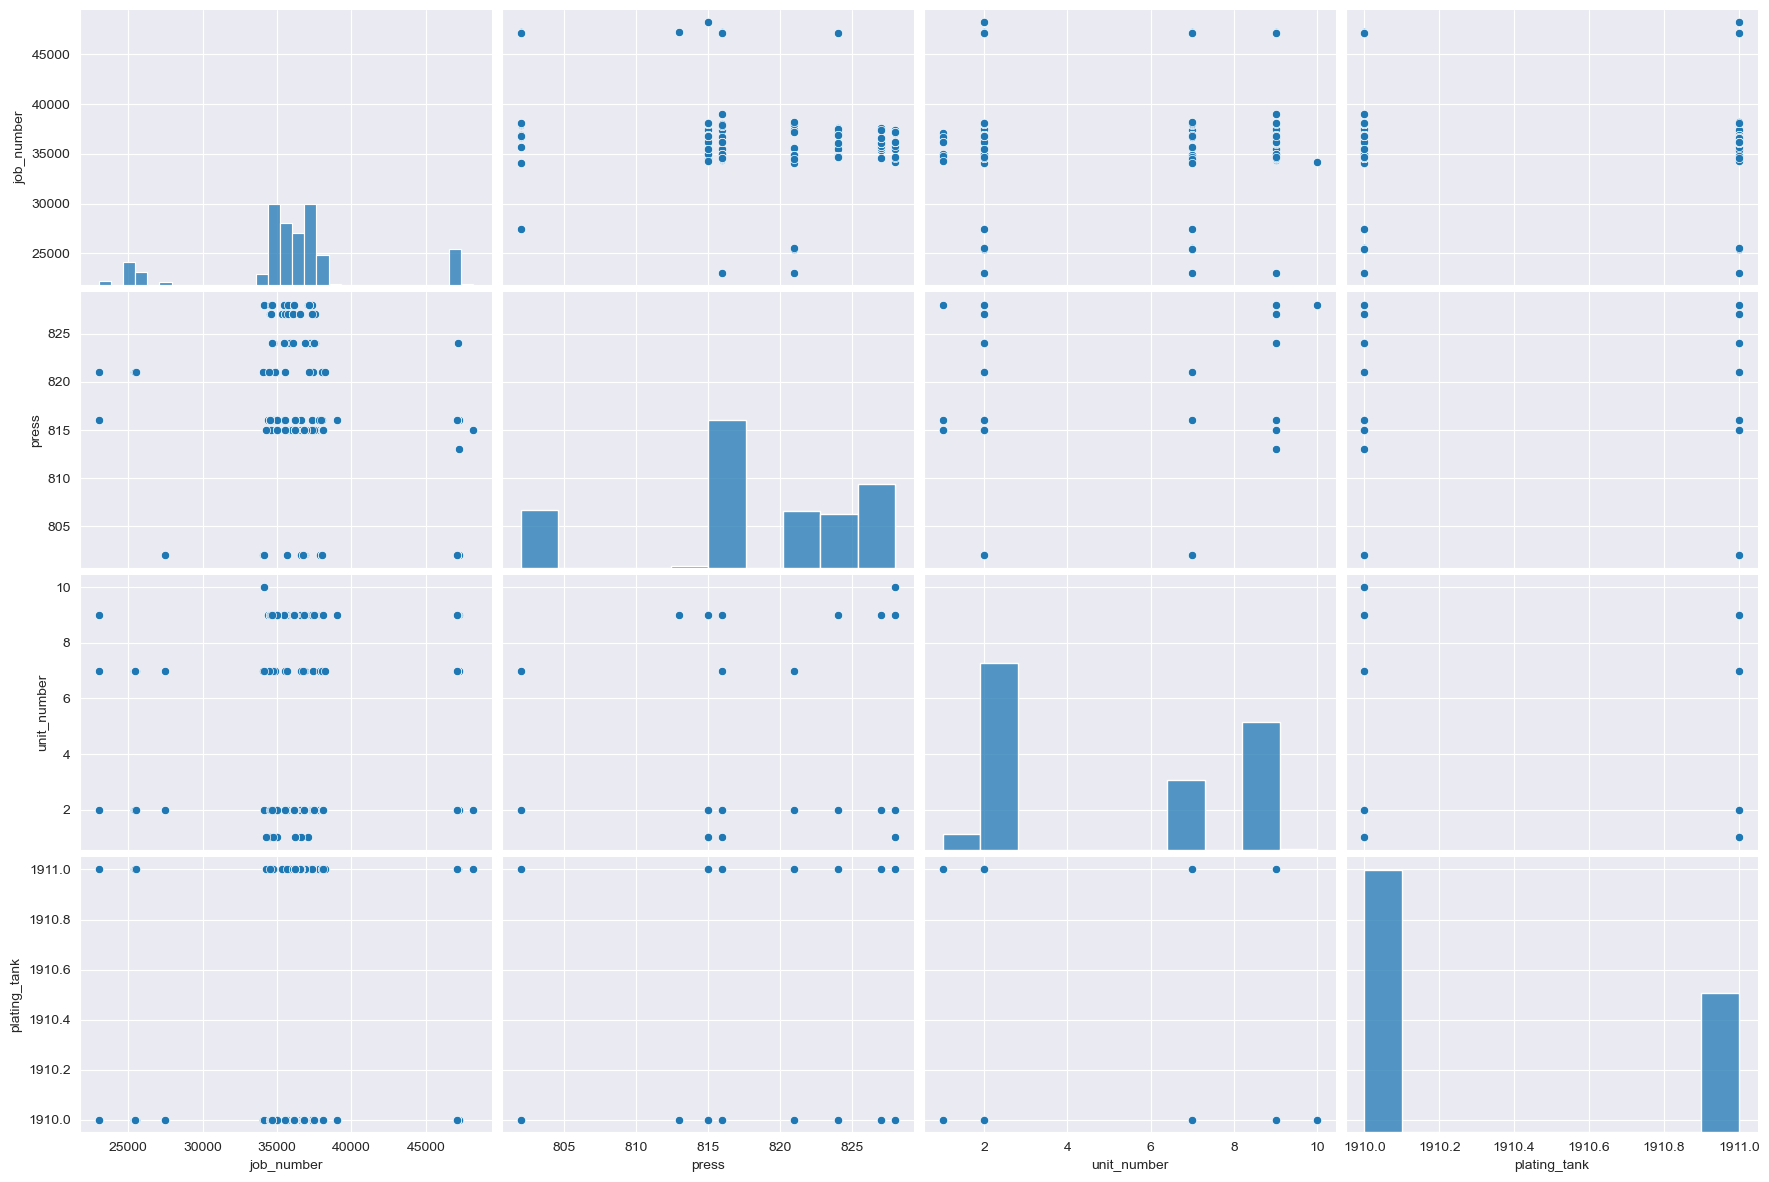

In [27]:
# для перших 20-ти атрибутів
selected_attrs = df.columns[:20]
sns.pairplot(df[selected_attrs], height=3, aspect=1.5)
plt.show()